# 0. Install Library

In [48]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c3/eb/496aa2f5d356af4185f770bc76055307f8d1870e11016b10fd779b21769c/xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 13.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/a6/11/5171f6a1ecf7f008648fef6ef780d92414763ff5ba50a796657b9275dc1e/lightgbm-4.2.0-py3-none-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/4c/6a/219a431aaf81b3eb3070fd2d58116baa366d3072f43bbcc87dc3495b7546/optuna-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/95/df/520663eb7f7a329f7c585834b754bcc3cbcc03957d85fcbba4a2a723ad9d/colorlog-6.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=1.3.0 from https://files.pythonhosted.org/packages/2c/e6/967cd898cbce485c385d4cd644195f906b2571f9393dc1537019a821a8a6/SQLAlchemy-2.0.25-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/24/3b/11fe92d68c6a42468ddab0cf03f454419b0788fff4e91

In [74]:
!pip install plotly


In [ ]:
pip install kaleido

In [ ]:
pip install cufflinks

# 1. Library Import

In [16]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

## Optuna tunning for XGB
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import optuna

## Optuna visulization
import plotly.express as px
import plotly.graph_objects as go
import plotly


# 2. Data Loading

In [17]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '../data/train_latlon.csv'
test_path  = '../data/test_latlon.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
# Train data와 Test data shape은 아래와 같습니다.
print('Train data shape : ', train.shape, 'Test data shape : ', test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [4]:
# Train과 Test data를 살펴보겠습니다.
display(train.head(1))
display(test.head(1))      # 부동산 실거래가(=Target) column이 제외된 모습입니다.

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202307,26,5,1987,...,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0


# 3. Check Data

In [5]:
train.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

### 3-1. Variable Korean to English 

In [6]:
train.rename(columns={'시군구':'city','번지':'address','본번':'first_num','부번':'second_num','아파트명':'name',
                      '전용면적(㎡)':'area','계약년월':'contract_year','계약일':'contract_day','층':'floor',
                      '건축년도':'construction_year','도로명':'road_name','해제사유발생일':'cancellation_day',
                      '등기신청일자':'registration_day','거래유형':'transaction_type','중개사소재지':'estate_agent',
                      'k-단지분류(아파트,주상복합등등)':'classification_complex','k-전화번호':'phone_number',
                      'k-팩스번호':'fax_number','단지소개기존clob':'clob','k-세대타입(분양형태)':'sales_type',
                      'k-관리방식':'management_system','k-복도유형':'hallway_type','k-난방방식':'heating_system',
                      'k-전체동수':'total_unit','k-전체세대수':'total_households',
                      'k-건설사(시공사)':'construction_company','k-시행사':'developer',
                      'k-사용검사일-사용승인일':'inspection_approval_date', 'k-연면적': 'total_area',
                      'k-주거전용면적':'residential_area','k-관리비부과면적':'management_fee_area',
                      'k-전용면적별세대현황(60㎡이하)':'household_status_by_area_60',
                      'k-전용면적별세대현황(60㎡~85㎡이하)':'household_status_by_area_85',
                      'k-85㎡~135㎡이하':'household_status_by_area_135', 'k-135㎡초과':'household_status_by_area_big',
                      'k-홈페이지':'homepage','k-등록일자':'registration_date', 'k-수정일자':'modification_date',
                      '고용보험관리번호':'employment_insurance_management_number','경비비관리형태':'guard_management_type',
                      '세대전기계약방법':'electricity_contract','청소비관리형태':'cleaning_fee_management_type',
                      '건축면적':'building_area','주차대수':'parking_space','기타/의무/임대/임의=1/2/3/4':'other1_obligation2_rent3_optional4',
                      '단지승인일':'unit_approval_date','사용허가여부':'permission_yes_no','관리비 업로드':'management_cost',
                      '좌표X':'axisX','좌표Y':'axisY','단지신청일':'unit_application_date'
                      },inplace=True)

In [7]:
test.rename(columns={'시군구':'city','번지':'address','본번':'first_num','부번':'second_num','아파트명':'name',
                      '전용면적(㎡)':'area','계약년월':'contract_year','계약일':'contract_day','층':'floor',
                      '건축년도':'construction_year','도로명':'road_name','해제사유발생일':'cancellation_day',
                      '등기신청일자':'registration_day','거래유형':'transaction_type','중개사소재지':'estate_agent',
                      'k-단지분류(아파트,주상복합등등)':'classification_complex','k-전화번호':'phone_number',
                      'k-팩스번호':'fax_number','단지소개기존clob':'clob','k-세대타입(분양형태)':'sales_type',
                      'k-관리방식':'management_system','k-복도유형':'hallway_type','k-난방방식':'heating_system',
                      'k-전체동수':'total_unit','k-전체세대수':'total_households',
                      'k-건설사(시공사)':'construction_company','k-시행사':'developer',
                      'k-사용검사일-사용승인일':'inspection_approval_date', 'k-연면적': 'total_area',
                      'k-주거전용면적':'residential_area','k-관리비부과면적':'management_fee_area',
                      'k-전용면적별세대현황(60㎡이하)':'household_status_by_area_60',
                      'k-전용면적별세대현황(60㎡~85㎡이하)':'household_status_by_area_85',
                      'k-85㎡~135㎡이하':'household_status_by_area_135', 'k-135㎡초과':'household_status_by_area_big',
                      'k-홈페이지':'homepage','k-등록일자':'registration_date', 'k-수정일자':'modification_date',
                      '고용보험관리번호':'employment_insurance_management_number','경비비관리형태':'guard_management_type',
                      '세대전기계약방법':'electricity_contract','청소비관리형태':'cleaning_fee_management_type',
                      '건축면적':'building_area','주차대수':'parking_space','기타/의무/임대/임의=1/2/3/4':'other1_obligation2_rent3_optional4',
                      '단지승인일':'unit_approval_date','사용허가여부':'permission_yes_no','관리비 업로드':'management_cost',
                      '좌표X':'axisX','좌표Y':'axisY','단지신청일':'unit_application_date'
                      },inplace=True)

# 4. Train EDA

In [9]:
#  결측치가 없는 행 = 0 city / 5 area / 6 contract_year / 7 contract_day / 8 floor 
#  / 9 construction_year / 10 road_name / 12 registration_day / 13 transaction_type 
#  / 14 estate_agent / 51 target
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   city                                    1118822 non-null  object 
 1   address                                 1118822 non-null  object 
 2   first_num                               1118747 non-null  float64
 3   second_num                              1118747 non-null  float64
 4   name                                    1116696 non-null  object 
 5   area                                    1118822 non-null  float64
 6   contract_year                           1118822 non-null  int64  
 7   contract_day                            1118822 non-null  int64  
 8   floor                                   1118822 non-null  int64  
 9   construction_year                       1118822 non-null  int64  
 10  road_name                     

In [8]:
train1 = train.copy()

### 4-1. train1 EDA

In [11]:
train1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   city                                    1118822 non-null  object 
 1   address                                 1118822 non-null  object 
 2   first_num                               1118747 non-null  float64
 3   second_num                              1118747 non-null  float64
 4   name                                    1116696 non-null  object 
 5   area                                    1118822 non-null  float64
 6   contract_year                           1118822 non-null  int64  
 7   contract_day                            1118822 non-null  int64  
 8   floor                                   1118822 non-null  int64  
 9   construction_year                       1118822 non-null  int64  
 10  road_name                     

In [12]:
max_target_row = train1[train1['target'] == train1['target'].max()]
max_target_row

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,building_area,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,target
224567,서울특별시 강남구 청담동,129,129.0,0.0,PH129,273.96,202204,28,16,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,127.052322,37.525754,NaN,1450000


In [13]:
train1.describe()

,first_num,second_num,area,contract_year,contract_day,floor,construction_year,cancellation_day,clob,total_unit,...,management_fee_area,household_status_by_area_60,household_status_by_area_85,household_status_by_area_135,household_status_by_area_big,building_area,parking_space,axisX,axisY,target
count,1.118747e+06,1.118747e+06,1.118822e+06,1.118822e+06,1.118822e+06,1.118822e+06,1.118822e+06,5.983000e+03,68582.000000,248192.000000,...,249259.000000,249214.000000,249214.000000,249214.000000,327.0,2.491080e+05,249108.000000,1.118822e+06,1.118822e+06,1.118822e+06
mean,5.649108e+02,5.978885e+00,7.717475e+01,2.014760e+05,1.580656e+01,8.871968e+00,1.998755e+03,2.021057e+07,541.529979,14.798346,...,120726.487549,477.912838,476.713439,167.528470,70.0,1.895070e+05,1063.678778,1.269970e+02,3.755535e+01,5.799153e+04
std,5.160642e+02,4.668584e+01,2.936423e+01,4.187868e+02,8.721166e+00,5.982584e+00,9.333908e+00,1.060697e+04,751.809853,17.693533,...,129020.276480,759.909400,727.553569,248.928143,0.0,1.729027e+06,1235.437604,4.423920e-01,1.402568e-01,4.642602e+04
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,2.020022e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.500000e+02
25%,1.760000e+02,0.000000e+00,5.965000e+01,2.011100e+05,8.000000e+00,4.000000e+00,1.992000e+03,2.020082e+07,4.000000,5.000000,...,40735.000000,48.000000,95.000000,0.000000,70.0,0.000000e+00,315.000000,1.269196e+02,3.750680e+01,3.050000e+04
50%,4.700000e+02,0.000000e+00,8.188000e+01,2.015070e+05,1.600000e+01,8.000000e+00,2.000000e+03,2.021030e+07,174.000000,10.000000,...,78125.000000,225.000000,256.000000,63.000000,70.0,1.710550e+03,683.000000,1.270202e+02,3.754711e+01,4.480000e+04
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018040e+05,2.300000e+01,1.200000e+01,2.005000e+03,2.022021e+07,725.000000,17.000000,...,159544.000000,576.000000,582.000000,237.000000,70.0,8.414210e+03,1274.000000,1.270724e+02,3.760002e+01,6.980000e+04
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023060e+05,3.100000e+01,6.900000e+01,2.023000e+03,2.023093e+07,2888.000000,124.000000,...,969877.000000,4975.000000,5132.000000,1500.000000,70.0,3.159620e+07,12096.000000,1.271800e+02,3.768772e+01,1.450000e+06


### 4-1-1. VARIABLE

#### 4-1-1-1. address

In [14]:
train1[train1['address'].isna()]

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,building_area,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,target


In [9]:
train1.loc[(train1['address'].isna()) & (train1['name'] == '서초포레스타2단지'), 'address'] = 384
# train1[(train1['city'] == '서울특별시 서초구 내곡동')&(train['name']=='서초포레스타2단지')]

train1.loc[(train1['address'].isna()) & (train1['name'] == '힐스테이트 서초 젠트리스'), 'address'] = 557
# train1[(train1['city'] == '서울특별시 서초구 신원동')&(train['name']=='힐스테이트 서초 젠트리스')]

#### 4-1-1-2. first_num / second_num

In [16]:
# 'first_num' & 'second_num' null : 75개
# 'name' = 힐스테이트 서초 젠트리스' 경우만 null

train1[train1[['first_num','second_num']].isna().any(axis=1)]

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,building_area,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,target
60194,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,114.90,201801,6,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,147000
60195,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,114.90,201801,8,4,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,134000
60196,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.99,201801,8,1,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,114000
60197,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.95,201801,12,3,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,109250
60198,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,114.90,201801,24,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720188,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.99,201504,17,9,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,79000
720189,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,101.90,201505,1,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,95000
720190,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.95,201506,16,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,87200
720191,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,101.90,201506,26,8,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,94500


In [17]:
train1[(train1['first_num'].isna())&(train['name']=='힐스테이트 서초 젠트리스')]

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,building_area,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,target
60194,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,114.90,201801,6,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,147000
60195,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,114.90,201801,8,4,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,134000
60196,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.99,201801,8,1,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,114000
60197,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.95,201801,12,3,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,109250
60198,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,114.90,201801,24,7,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720188,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.99,201504,17,9,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,79000
720189,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,101.90,201505,1,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,95000
720190,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,84.95,201506,16,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,87200
720191,서울특별시 서초구 신원동,557,NaN,NaN,힐스테이트 서초 젠트리스,101.90,201506,26,8,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,127.05985,37.44505,NaN,94500


힐스테이트 서초 젠트리스의 경우만 second_num이 Null 존재. 해당 변수의 결측치를 처리.

In [10]:
train1.loc[(train1['first_num'].isna()) & (train1['name'] == '힐스테이트 서초 젠트리스'), 'first_num'] = 557

train1.loc[(train1['second_num'].isna()) & (train1['name'] == '힐스테이트 서초 젠트리스'), 'second_num'] = 0

#### 4-1-1-3. city -> gu/dong

'시군구'에서 '구'와 '동' Column을 새롭게 만듦.  
'구'와 '동' 별 EDA를 위함.  

In [11]:
# 'city' 열을 공백을 기준으로 분할하여 'gu'와 'dong' 열 생성
train1[['gu', 'dong']] = train1['city'].str.split(expand=True)[[1, 2]]

train1

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,target,gu,dong
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,은평구,구산동
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,은평구,구산동
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000,은평구,구산동
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000,은평구,구산동


#### 4-1-1-4. name

아파트명은 아파트별 target 평균가를 예측하는 모델링에 도움이 되므로,  
결측치 확인 및 처리 여부 관련 EDA 


In [20]:
unique_names_list = list(train1['name'].unique())

# 요소들 출력
print("Unique Names:")
print(unique_names_list)

# 개수 출력
print("\nNumber of Unique Names:", len(unique_names_list))

Unique Names:
['개포6차우성', '개포우성3차', '개포자이', '개포주공1단지', '개포주공5단지', '개포주공6단지', '동양파라곤', '마일스디오빌', '아크로힐스논현', '대치삼성', '대치현대', '대치효성', '래미안대치하이스턴', '롯데캐슬리베', '테헤란로대우아이빌', '도곡렉슬', '도곡쌍용예가', '도곡우성', '래미안도곡카운티', '대치아이파크', '은마', '개포주공4단지', '개포주공7단지', '개포현대200동', '경남1', '경남2차', '뉴현대파크빌', '리치타운', '삼익대청', '새롬', '성원대치2단지', '시영', '아람손프라자/비바빌', '에버그린', '우성8', '우성9차', '우찬현대', '현대', '현대1차101동~106동', '현대2', 'e-편한세상', '거평프리젠', '경남논현', '골든캐슬', '논현동월드메르디앙', '논현동프라임', '논현동한화꿈에그린', '논현라폴리움', '논현베르빌', '논현빌라트', '논현아트빌', '논현웰스톤', '논현파라곤', '논현프라임', '논현한가람빌라트', '동부센트레빌', '동현', '두산위브1단지', '두산위브2단지', '두영', '벨러스빌', '브라운스톤', '스위트캐슬레지던스', '신동아', '쌍용', '우민', '우성', '월드쉐르빌', '이산', '이움빌라', '지고하임', '청학', '케럿스테이트', '케이씨빌', '토미빌', '프라임', '학동', '한양빌라트', '한양수자인어반게이트', '한진로즈힐', '한화꿈에그린2차', '현대넥서스A동', '현대인텔렉스', '개포우성1', '개포우성2', '대우아이빌멤버스', '대우아이빌명문가', '대치SKVIEW', '대치동우정에쉐르1', '대치동우정에쉐르2', '대치우성', '대치하나빌', '대치한신휴플러스', '동민맥스빌A동', '동민맥스빌B동', '동양', '래미안대치팰리스', '롯데캐슬', '메트로', '삼성2차', '삼성3차', '선경1차', '선경2차', '선경3차', '선릉역대우아이빌', '선릉역풍

In [21]:
# name null : 2126개 
unique_names_list = list(train1[(train1['name'].isna())]['address'].unique())
unique_names_list2 = list(train1[(train1['name'].isna())]['city'].unique())

# 요소들 출력
print("Unique Names:")
print(unique_names_list)
print(unique_names_list2)

# 개수 출력
print("\nNumber of Unique Names:", len(unique_names_list))
print("\nNumber of Unique Names:", len(unique_names_list2))

Unique Names:
['828-21', '828-76', '685-103', '739-29', '740-33', '742-57', '742-58', '743-10', '743-27', '743-60', '744-15', '744-19', '745-14', '745-57', '747-52', '749-57', '750-13', '750-15', '750-8', '751-32', '752-19', '752-23', '770-23', '770-37', '770-40', '770-52', '771-1', '771-2', '780-50', '781-26', '781-6', '791-62', '792-10', '792-102', '792-17', '792-54', '792-9', '793-44', '793-54', '796-11', '796-12', '797-15', '797-57', '798-22', '798-27', '799-11', '803-29', '805-16', '806-14', '807-16', '807-26', '404-13', '400-3', '99-1', '323-4', '91-511', '1617-21', '185-5', '1101-1', '627-120', '432-904', '717-10', '718-7', '743-31', '743-33', '743-40', '743-8', '744-21', '744-3', '744-45', '744-48', '746-14', '746-17', '747-10', '747-53', '749-1', '749-29', '749-30', '749-49', '770-39', '770-54', '770-56', '770-8', '771-30', '779-13', '780-29', '780-62', '781-12', '793-6', '794-17', '797-25', '797-43', '798-24', '807-19', '807-30', '66-3', '23-42', '204-11', '436-79', '372-66',

In [22]:
# train1 데이터프레임에서 'name' 열이 결측치인 행 선택
missing_name_rows = train1[train1['name'].isna()]

# 선택된 행들에 대해 '구'+'first_num'+'_'+'second_num'로 결측치 대입
missing_name_rows['name'] = missing_name_rows['dong'] + missing_name_rows['first_num'].astype(str) + '_' + missing_name_rows['second_num'].astype(str)

# 기존 train1에 변경된 행들을 업데이트
train1.update(missing_name_rows)

train1

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,target,gu,dong
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712.0,8.0,3.0,1987.0,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000.0,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712.0,22.0,4.0,1987.0,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500.0,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712.0,28.0,5.0,1987.0,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500.0,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801.0,3.0,4.0,1987.0,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000.0,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801.0,8.0,2.0,1987.0,...,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000.0,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707.0,12.0,11.0,1998.0,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000.0,은평구,구산동
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708.0,25.0,10.0,1998.0,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000.0,은평구,구산동
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708.0,31.0,20.0,1998.0,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000.0,은평구,구산동
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709.0,15.0,8.0,1998.0,...,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000.0,은평구,구산동


In [23]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 54 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   city                                    1118822 non-null  object 
 1   address                                 1118822 non-null  object 
 2   first_num                               1118822 non-null  float64
 3   second_num                              1118822 non-null  float64
 4   name                                    1118822 non-null  object 
 5   area                                    1118822 non-null  float64
 6   contract_year                           1118822 non-null  float64
 7   contract_day                            1118822 non-null  float64
 8   floor                                   1118822 non-null  float64
 9   construction_year                       1118822 non-null  float64
 10  road_name                     

# 5. Train1 Save

In [12]:
train1.to_csv('../data/train1.csv', index=False)

# 6. Test EDA

In [25]:
#  결측치가 없는 행 = 0 city / 1 address / 2 first_num / 3 second_num 
#  / 5 area / 6 contract_year / 7 contract_day / 8 floor 
#  / 9 construction_year / 10 road_name / 12 registration_day / 13 transaction_type 
#  / 14 estate_agent
test.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   city                                    9272 non-null   object 
 1   address                                 9272 non-null   object 
 2   first_num                               9272 non-null   float64
 3   second_num                              9272 non-null   float64
 4   name                                    9262 non-null   object 
 5   area                                    9272 non-null   float64
 6   contract_year                           9272 non-null   int64  
 7   contract_day                            9272 non-null   int64  
 8   floor                                   9272 non-null   int64  
 9   construction_year                       9272 non-null   int64  
 10  road_name                               9272 non-null   obje

In [13]:
test1 = test.copy()

### 6-1. test1 EDA

In [27]:
test1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   city                                    9272 non-null   object 
 1   address                                 9272 non-null   object 
 2   first_num                               9272 non-null   float64
 3   second_num                              9272 non-null   float64
 4   name                                    9262 non-null   object 
 5   area                                    9272 non-null   float64
 6   contract_year                           9272 non-null   int64  
 7   contract_day                            9272 non-null   int64  
 8   floor                                   9272 non-null   int64  
 9   construction_year                       9272 non-null   int64  
 10  road_name                               9272 non-null   obje

In [28]:
test1.describe()

,first_num,second_num,area,contract_year,contract_day,floor,construction_year,cancellation_day,clob,total_unit,...,residential_area,management_fee_area,household_status_by_area_60,household_status_by_area_85,household_status_by_area_135,household_status_by_area_big,building_area,parking_space,axisX,axisY
count,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,2.120000e+02,554.000000,2695.000000,...,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2.0,2.707000e+03,2709.000000,9272.000000,9272.000000
mean,615.101920,5.676553,75.414506,202307.786238,14.967429,10.021031,2003.034944,2.023085e+07,509.449458,15.964378,...,112778.400369,147543.961255,540.149077,650.756458,191.367528,70.0,2.810885e+05,1493.321890,126.971180,37.544719
std,592.812553,53.852248,29.343517,0.733229,8.802402,6.653698,11.179837,6.620189e+01,735.779511,16.624556,...,133849.314706,174399.552088,664.253362,994.919651,306.273345,0.0,2.217457e+06,2021.501717,1.867253,0.554172
min,0.000000,0.000000,12.000000,202307.000000,1.000000,-3.000000,1961.000000,2.023070e+07,4.000000,1.000000,...,2338.000000,0.000000,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,0.000000,0.000000
25%,234.750000,0.000000,59.700000,202307.000000,8.000000,5.000000,1996.000000,2.023081e+07,4.000000,6.000000,...,40591.000000,51436.000000,116.000000,156.000000,0.000000,70.0,0.000000e+00,431.000000,126.924730,37.506088
50%,509.000000,0.000000,76.570000,202308.000000,15.000000,9.000000,2003.000000,2.023083e+07,144.000000,10.000000,...,69301.000000,92808.000000,326.000000,377.000000,74.000000,70.0,4.571390e+03,930.000000,127.018410,37.548410
75%,816.000000,0.000000,84.960000,202308.000000,22.000000,14.000000,2012.000000,2.023091e+07,638.000000,19.000000,...,137731.000000,181847.000000,683.000000,745.000000,246.000000,70.0,1.138507e+04,1777.000000,127.072420,37.588207
max,4974.000000,2164.000000,301.470000,202309.000000,31.000000,65.000000,2023.000000,2.023093e+07,2888.000000,84.000000,...,734781.000000,969877.000000,3710.000000,5132.000000,1500.000000,70.0,2.404140e+07,12096.000000,127.179998,37.687725


### 6-1-1. VARIABLE

#### 6-1-1-1. city -> gu / dong

'구'와 '동'으로 EDA를 하기 위한 '시군구'를 분리  

In [14]:
# 'city' 열을 공백을 기준으로 분할하여 'gu'와 'dong' 열 생성
test1[['gu', 'dong']] = test1['city'].str.split(expand=True)[[1, 2]]

test1

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,gu,dong
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,강남구,개포동
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0,강남구,개포동
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,강남구,개포동
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,강남구,개포동
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6500,202307,19,13,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동
9268,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6200,202307,25,12,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동
9269,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.6500,202308,27,12,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동
9270,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.9400,202309,2,18,2014,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동


#### 6-1-1-2. name

In [30]:
# null 10개
test1[test1['name'].isna()]

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,gu,dong
2451,서울특별시 구로구 구로동,740-7,740.0,7.0,NaN,35.10,202308,21,4,1996,...,NaN,NaN,NaN,NaN,NaN,126.884548,37.494585,NaN,구로구,구로동
2452,서울특별시 구로구 구로동,743-27,743.0,27.0,NaN,59.56,202309,8,1,1994,...,NaN,NaN,NaN,NaN,NaN,126.884548,37.494585,NaN,구로구,구로동
2453,서울특별시 구로구 구로동,747-34,747.0,34.0,NaN,49.11,202308,4,2,2000,...,NaN,NaN,NaN,NaN,NaN,126.884548,37.494585,NaN,구로구,구로동
2454,서울특별시 구로구 구로동,752-17,752.0,17.0,NaN,33.56,202307,3,3,1994,...,NaN,NaN,NaN,NaN,NaN,126.884548,37.494585,NaN,구로구,구로동
2455,서울특별시 구로구 구로동,780-86,780.0,86.0,NaN,35.55,202307,5,5,1961,...,NaN,NaN,NaN,NaN,NaN,126.884548,37.494585,NaN,구로구,구로동
4035,서울특별시 동대문구 장안동,404-13,404.0,13.0,NaN,84.86,202308,18,7,2005,...,NaN,NaN,NaN,NaN,NaN,127.068060,37.571050,NaN,동대문구,장안동
4449,서울특별시 동작구 상도동,323-4,323.0,4.0,NaN,106.51,202307,5,3,2005,...,NaN,NaN,NaN,NaN,NaN,126.944104,37.498816,NaN,동작구,상도동
8041,서울특별시 영등포구 대림동,1101-1,1101.0,1.0,NaN,14.46,202307,8,6,2012,...,NaN,NaN,NaN,NaN,NaN,126.899936,37.495757,NaN,영등포구,대림동
8042,서울특별시 영등포구 대림동,1101-1,1101.0,1.0,NaN,14.46,202307,21,10,2012,...,NaN,NaN,NaN,NaN,NaN,126.899936,37.495757,NaN,영등포구,대림동
8966,서울특별시 중구 신당동,432-904,432.0,904.0,NaN,59.16,202309,13,4,2001,...,NaN,NaN,NaN,NaN,NaN,127.014920,37.556901,NaN,중구,신당동


In [31]:
# train1 데이터프레임에서 'name' 열이 결측치인 행 선택
missing_name_rows = test1[test1['name'].isna()]

# 선택된 행들에 대해 '구'+'first_num'+'_'+'second_num'로 결측치 대입
missing_name_rows['name'] = missing_name_rows['dong'] + missing_name_rows['first_num'].astype(str) + '_' + missing_name_rows['second_num'].astype(str)

# 기존 train1에 변경된 행들을 업데이트
test1.update(missing_name_rows)

test1

,city,address,first_num,second_num,name,area,contract_year,contract_day,floor,construction_year,...,parking_space,other1_obligation2_rent3_optional4,unit_approval_date,permission_yes_no,management_cost,axisX,axisY,unit_application_date,gu,dong
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307.0,26.0,5.0,1987.0,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,강남구,개포동
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308.0,15.0,10.0,2021.0,...,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0,강남구,개포동
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307.0,28.0,15.0,1984.0,...,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,강남구,개포동
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308.0,10.0,14.0,1984.0,...,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,강남구,개포동
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308.0,18.0,6.0,1984.0,...,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6500,202307.0,19.0,13.0,2014.0,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동
9268,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6200,202307.0,25.0,12.0,2014.0,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동
9269,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.6500,202308.0,27.0,12.0,2014.0,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동
9270,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.9400,202309.0,2.0,18.0,2014.0,...,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0,중랑구,신내동


In [32]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   city                                    9272 non-null   object 
 1   address                                 9272 non-null   object 
 2   first_num                               9272 non-null   float64
 3   second_num                              9272 non-null   float64
 4   name                                    9272 non-null   object 
 5   area                                    9272 non-null   float64
 6   contract_year                           9272 non-null   float64
 7   contract_day                            9272 non-null   float64
 8   floor                                   9272 non-null   float64
 9   construction_year                       9272 non-null   float64
 10  road_name                               9272 non-null   obje

# 7. Test1 Save

In [15]:
test1.to_csv('../data/test1.csv', index=False)

# For Training

## BaseLine_Code

### 1. Data Preprocessing

In [15]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
train1['is_test'] = 0
test1['is_test'] = 1
concat = pd.concat([train1, test1])     # 하나의 데이터로 만들어줍니다.

In [16]:
concat['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

0    1118822
1       9272
Name: is_test, dtype: int64

### 결측치 탐색 및 보간

In [17]:
# 위 처럼 아무 의미도 갖지 않는 칼럼은 결측치와 같은 역할을 하므로, np.nan으로 채워 결측치로 인식되도록 합니다.
concat['registration_day'] = concat['registration_day'].replace(' ', np.nan)
concat['transaction_type'] = concat['transaction_type'].replace('-', np.nan)
concat['estate_agent'] = concat['estate_agent'].replace('-', np.nan)

In [19]:
# EDA에 앞서 결측치를 확인해보겠습니다.
concat.isnull().sum()

city                                            0
address                                         0
first_num                                       0
second_num                                      0
name                                         2126
area                                            0
contract_year                                   0
contract_day                                    0
floor                                           0
construction_year                               0
road_name                                       0
cancellation_day                          1121899
registration_day                          1111271
transaction_type                          1086451
estate_agent                              1090013
classification_complex                     877273
phone_number                               876850
fax_number                                 879348
clob                                      1058958
sales_type                                 876125


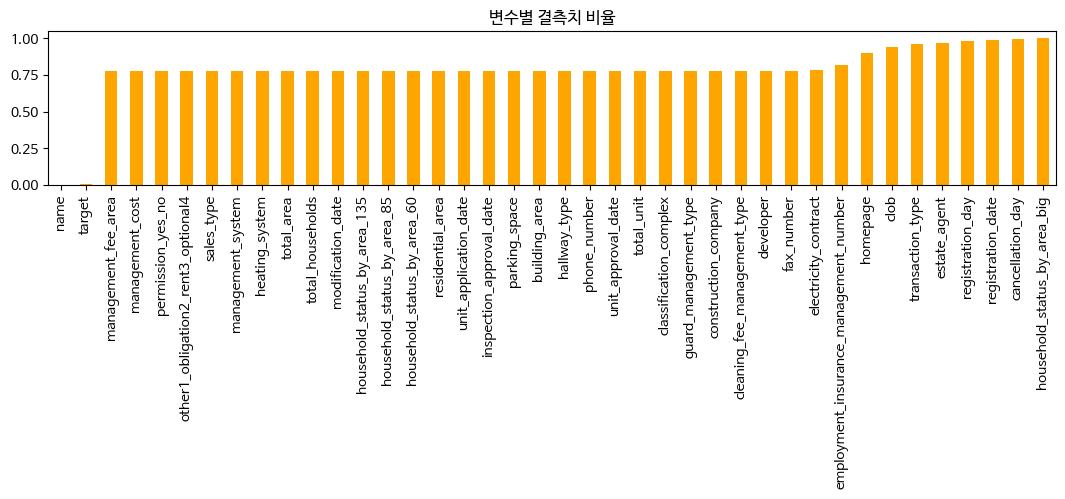

In [20]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

In [22]:
# Null값이 100만개 이상인 칼럼은 삭제해보도록 하겠습니다.
print('* 결측치가 100만개 이하인 변수들 :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # 남겨질 변수들은 아래와 같습니다.
print('* 결측치가 100만개 이상인 변수들 :', list(concat.columns[concat.isnull().sum() >= 1000000]))

* 결측치가 100만개 이하인 변수들 : ['city', 'address', 'first_num', 'second_num', 'name', 'area', 'contract_year', 'contract_day', 'floor', 'construction_year', 'road_name', 'classification_complex', 'phone_number', 'fax_number', 'sales_type', 'management_system', 'hallway_type', 'heating_system', 'total_unit', 'total_households', 'construction_company', 'developer', 'inspection_approval_date', 'total_area', 'residential_area', 'management_fee_area', 'household_status_by_area_60', 'household_status_by_area_85', 'household_status_by_area_135', 'modification_date', 'employment_insurance_management_number', 'guard_management_type', 'electricity_contract', 'cleaning_fee_management_type', 'building_area', 'parking_space', 'other1_obligation2_rent3_optional4', 'unit_approval_date', 'permission_yes_no', 'management_cost', 'axisX', 'axisY', 'unit_application_date', 'target', 'gu', 'dong', 'is_test']
* 결측치가 100만개 이상인 변수들 : ['cancellation_day', 'registration_day', 'transaction_type', 'estate_agent', 'clob',

In [23]:
# 위에서 결측치가 100만개 이하인 변수들만 골라 새로운 concat_select 객체로 저장해줍니다.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [24]:
concat_select.isnull().sum()     # 결측치가 100만개 초과인 칼럼이 제거된 모습은 아래와 같습니다.
# target변수는 test dataset 개수만큼(9272) 결측치가 존재함을 확인할 수 있습니다.

city                                           0
address                                        0
first_num                                      0
second_num                                     0
name                                        2126
area                                           0
contract_year                                  0
contract_day                                   0
floor                                          0
construction_year                              0
road_name                                      0
classification_complex                    877273
phone_number                              876850
fax_number                                879348
sales_type                                876125
management_system                         876125
hallway_type                              876454
heating_system                            876125
total_unit                                877207
total_households                          876125
construction_company

In [25]:
# 연속형 변수는 선형보간을 해주고, 범주형변수는 알수없기에 “unknown”이라고 임의로 보간해 주겠습니다.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 47 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   city                                    1128094 non-null  object 
 1   address                                 1128094 non-null  object 
 2   first_num                               1128094 non-null  float64
 3   second_num                              1128094 non-null  float64
 4   name                                    1125968 non-null  object 
 5   area                                    1128094 non-null  float64
 6   contract_year                           1128094 non-null  float64
 7   contract_day                            1128094 non-null  float64
 8   floor                                   1128094 non-null  float64
 9   construction_year                       1128094 non-null  float64
 10  road_name                        

In [26]:
# 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
concat_select['first_num'] = concat_select['first_num'].astype('str')
concat_select['second_num'] = concat_select['second_num'].astype('str')

In [27]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['area', 'contract_year', 'contract_day', 'floor', 'construction_year', 'total_unit', 'total_households', 'total_area', 'residential_area', 'management_fee_area', 'household_status_by_area_60', 'household_status_by_area_85', 'household_status_by_area_135', 'building_area', 'parking_space', 'axisX', 'axisY', 'target', 'is_test']
범주형 변수: ['city', 'address', 'first_num', 'second_num', 'name', 'road_name', 'classification_complex', 'phone_number', 'fax_number', 'sales_type', 'management_system', 'hallway_type', 'heating_system', 'construction_company', 'developer', 'inspection_approval_date', 'modification_date', 'employment_insurance_management_number', 'guard_management_type', 'electricity_contract', 'cleaning_fee_management_type', 'other1_obligation2_rent3_optional4', 'unit_approval_date', 'permission_yes_no', 'management_cost', 'unit_application_date', 'gu', 'dong']


In [28]:
# 범주형 변수에 대한 보간
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

### 이상치 처리

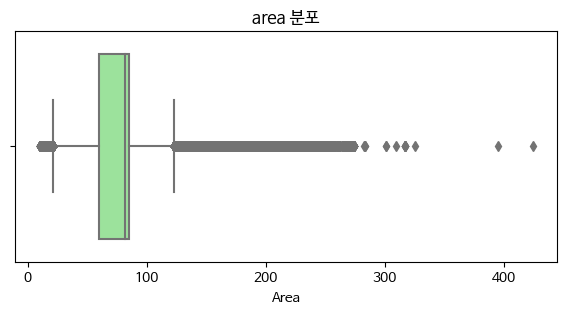

In [30]:
# 대표적인 연속형 변수인 “전용 면적” 변수 관련한 분포를 먼저 살펴보도록 하겠습니다.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'area', color='lightgreen')
plt.title('area 분포')
plt.xlabel('Area')
plt.show()

In [31]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    train1 = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    test1 = dt.query('is_test == 1')

    Q1 = train1[column_name].quantile(0.25)
    Q3 = train1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train1 = train1[(train1[column_name] >= lower_bound) & (train1[column_name] <= upper_bound)]

    result = pd.concat([train1, test1])   # test data와 다시 합쳐주겠습니다.
    return result

In [32]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat_select = remove_outliers_iqr(concat_select, 'area')

In [33]:
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(concat_select.shape)

(1038846, 47)


In [34]:
concat_select['is_test'].value_counts()     # 또한, train data만 제거되었습니다.

0    1029574
1       9272
Name: is_test, dtype: int64

### 2. Feature Engineering

In [35]:
concat_select['year_contract'] = concat_select['contract_year'].astype('str').map(lambda x : x[:4])
concat_select['month_contract'] = concat_select['contract_year'].astype('str').map(lambda x : x[4:])
del concat_select['contract_year']

In [37]:
all = list(concat_select['gu'].unique())
gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # 알맞게 분리되었는지 체크합니다.

In [38]:
# 건축년도 분포는 아래와 같습니다. 특히 2005년이 Q3에 해당합니다.
# 2009년 이후에 지어진 건물은 10%정도 되는 것을 확인할 수 있습니다.
concat_select['construction_year'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: construction_year, dtype: float64

In [39]:
# 따라서 2009년 이후에 지어졌으면 비교적 신축이라고 판단하고, 신축 여부 변수를 제작해보도록 하겠습니다.
concat_select['new_construction'] = concat_select['construction_year'].apply(lambda x: 1 if x >= 2009 else 0)

### 3. Model Training

In [40]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029574, 48) (9272, 48)


In [41]:
# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

#### 3-1. 범주형 변수 Encoding

In [42]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

연속형 변수: ['area', 'contract_day', 'floor', 'construction_year', 'total_unit', 'total_households', 'total_area', 'residential_area', 'management_fee_area', 'household_status_by_area_60', 'household_status_by_area_85', 'household_status_by_area_135', 'building_area', 'parking_space', 'axisX', 'axisY', 'target', 'new_construction']
범주형 변수: ['city', 'address', 'first_num', 'second_num', 'name', 'road_name', 'classification_complex', 'phone_number', 'fax_number', 'sales_type', 'management_system', 'hallway_type', 'heating_system', 'construction_company', 'developer', 'inspection_approval_date', 'modification_date', 'employment_insurance_management_number', 'guard_management_type', 'electricity_contract', 'cleaning_fee_management_type', 'other1_obligation2_rent3_optional4', 'unit_approval_date', 'permission_yes_no', 'management_cost', 'unit_application_date', 'gu', 'dong', 'year_contract', 'month_contract']


In [43]:
# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|██████████| 30/30 [00:08<00:00,  3.70it/s]


In [44]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

In [61]:
# Target과 독립변수들을 분리해줍니다.
# y_train = dt_train['target']
y = np.log1p(dt_train['target'])
X = dt_train.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1996)

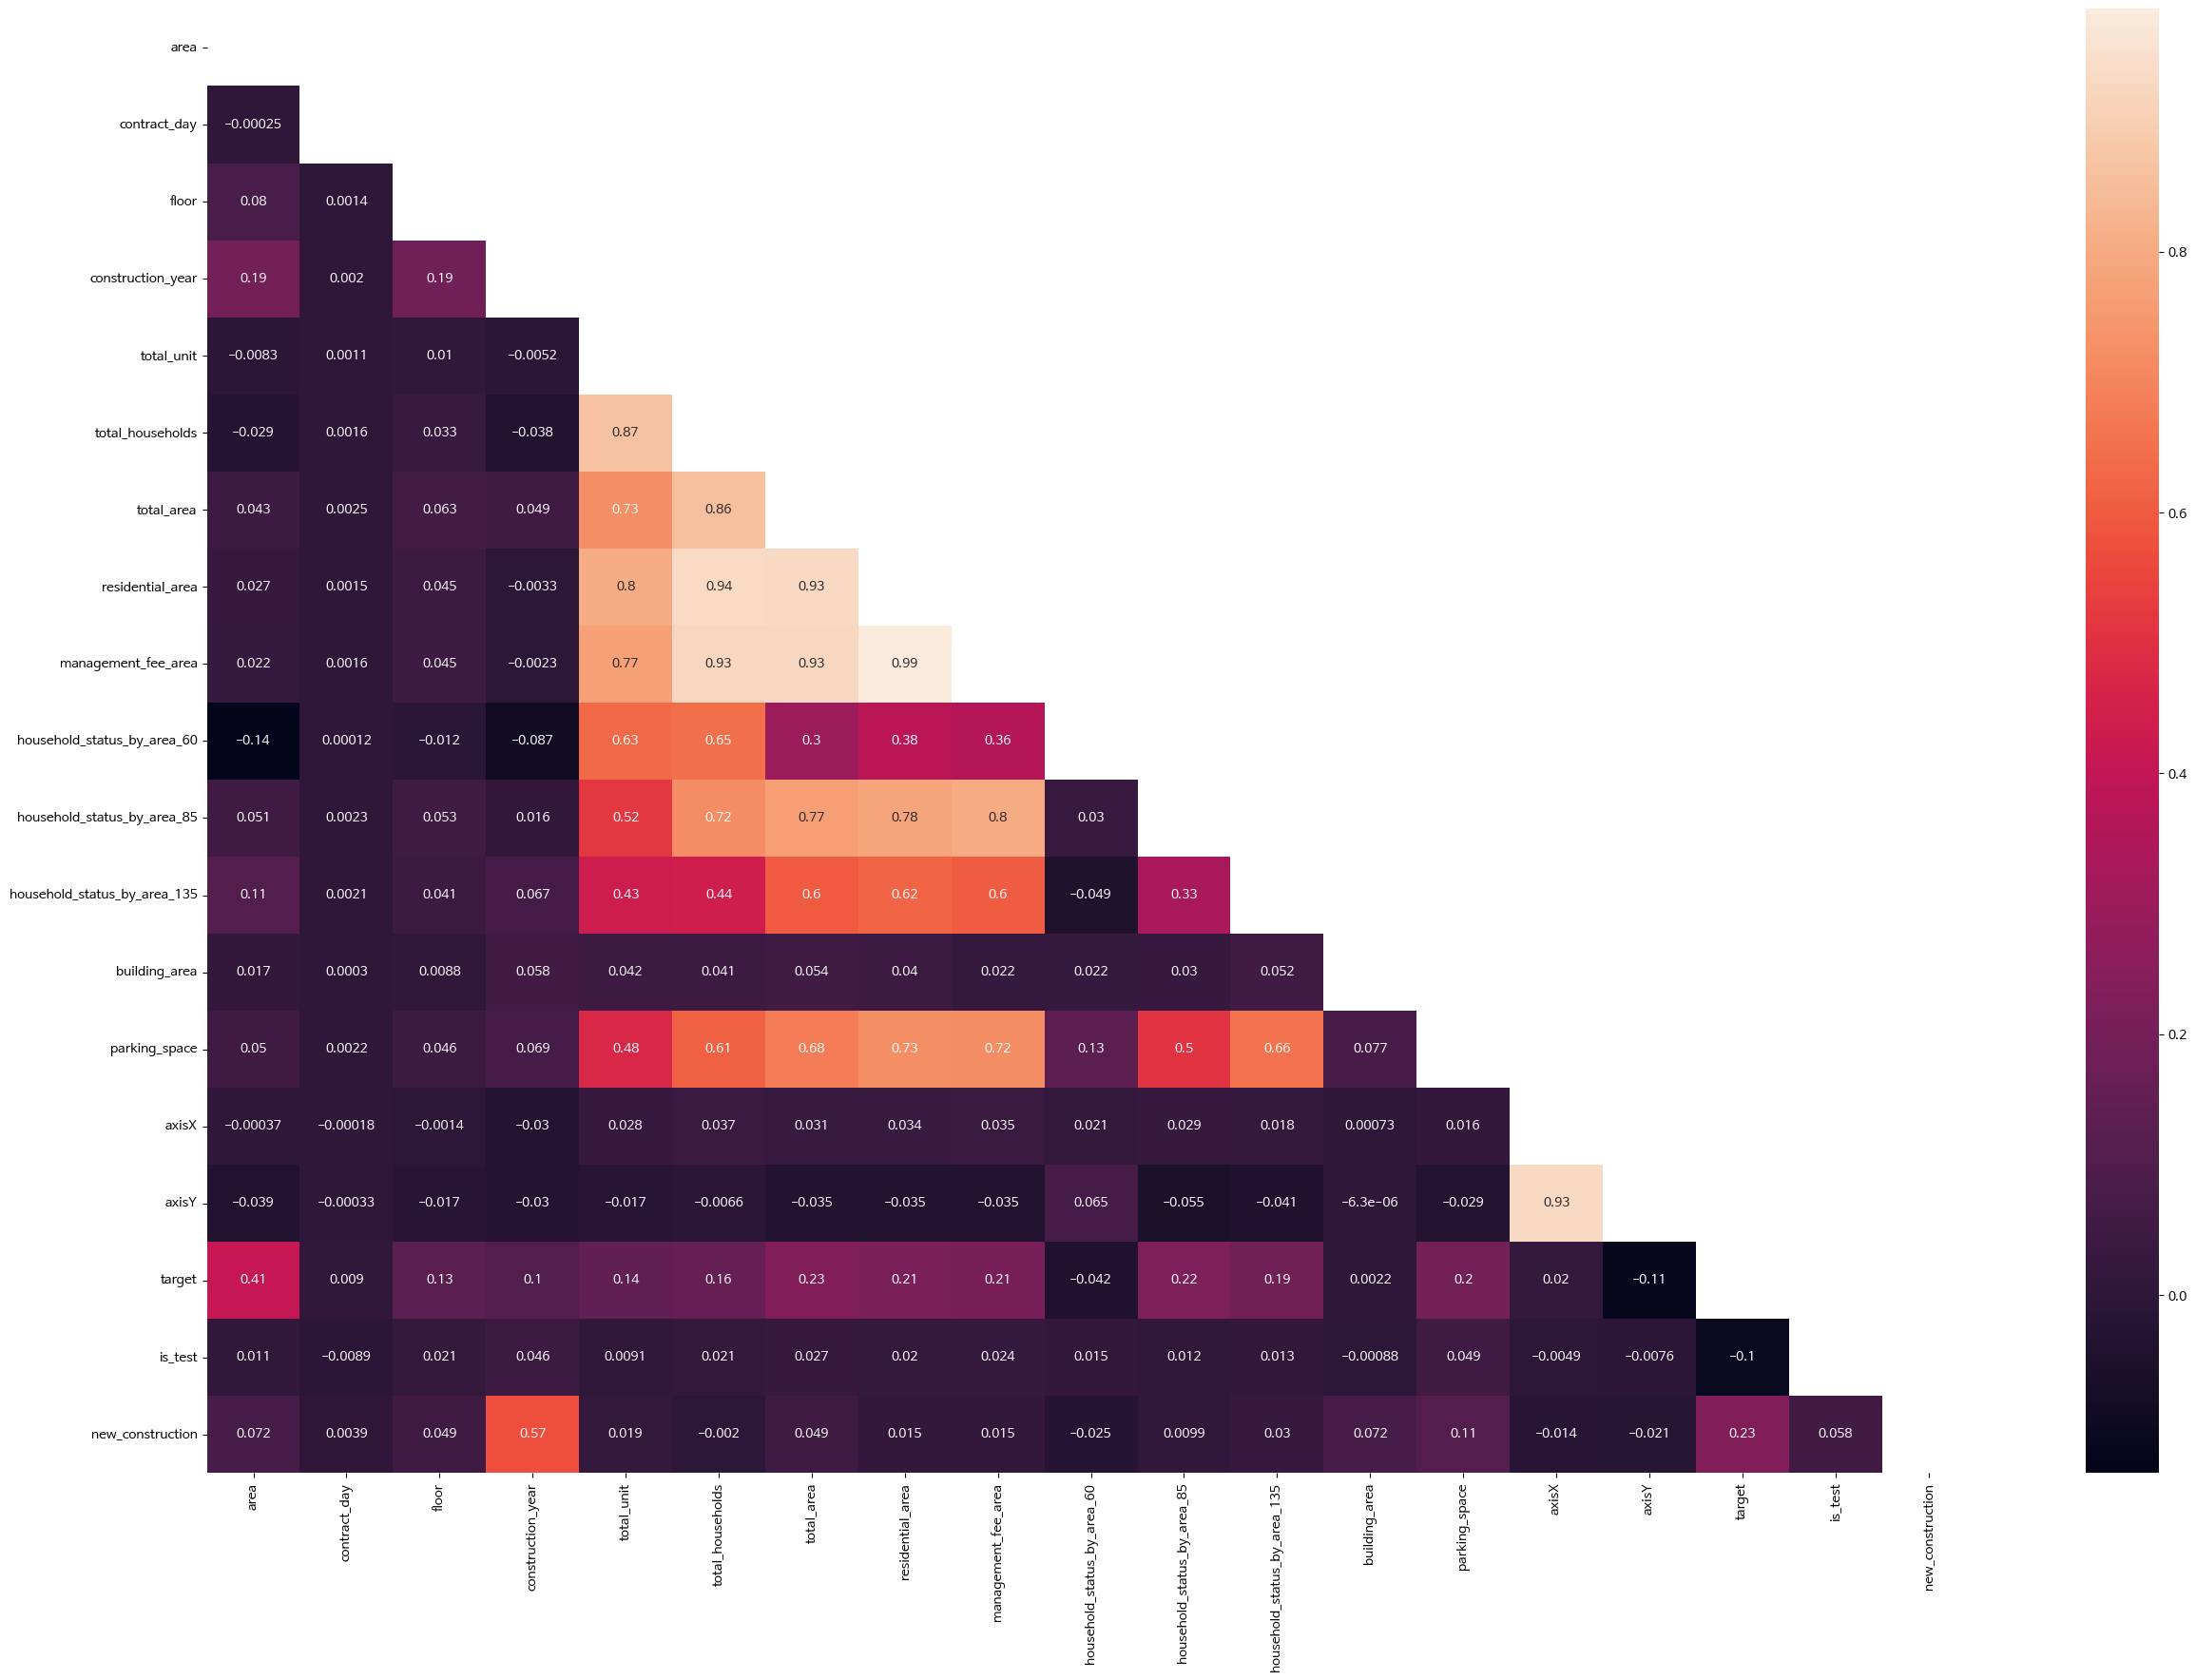

In [46]:
plt.figure(figsize=(30, 20))

mask = np.triu(np.ones_like(concat_select.corr(), dtype=bool))
sns.heatmap(concat_select.corr(), annot=True, mask=mask)
plt.show()

In [129]:
## Optuna tunning for XGB
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 50,1000),
    'max_depth': trial.suggest_int('max_depth', 3, 100),
    'min_child_weight': trial.suggest_float('min_child_weight', 2,100),
    'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log = True),
    'subsample': trial.suggest_float('subsample', 0.2, 1),
    'gamma': trial.suggest_float('gamma', 1e-3, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree',0.2,1),
    'colsample_bylevel': trial.suggest_float('colsample_bylevel',0.2,1),
    'colsample_bynode': trial.suggest_float('colsample_bynode', 0.2, 1)
    }
    
    xgbmodel_optuna = XGBRegressor(**params, random_state = 1996, tree_method = 'gpu_hist')
#     xgbmodel_optuna = XGBClassifier(**params, random_state = 1996)

    # K-Fold 
    cv = abs(cross_val_score(xgbmodel_optuna, X, y, cv = 5,scoring='neg_mean_squared_error').mean())
    return cv

In [130]:
%%time
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-01-16 10:53:41,145] A new study created in memory with name: no-name-18e0ec90-f01c-49d9-b441-b8d2ee48fdad
[I 2024-01-16 10:55:19,579] Trial 0 finished with value: 0.18567167887476638 and parameters: {'n_estimators': 203, 'max_depth': 32, 'min_child_weight': 89.54290160037822, 'learning_rate': 0.0023845790934192857, 'subsample': 0.2096207702399867, 'gamma': 0.3423307720151811, 'colsample_bytree': 0.9019659299101237, 'colsample_bylevel': 0.7943184552962514, 'colsample_bynode': 0.9777765225108312}. Best is trial 0 with value: 0.18567167887476638.
[I 2024-01-16 10:57:10,536] Trial 1 finished with value: 0.023954860586725503 and parameters: {'n_estimators': 617, 'max_depth': 49, 'min_child_weight': 39.950670968967344, 'learning_rate': 0.04045058390099022, 'subsample': 0.7318023453909881, 'gamma': 0.20023955402452775, 'colsample_bytree': 0.8793851615511701, 'colsample_bylevel': 0.29326939187735646, 'colsample_bynode': 0.9630203597294025}. Best is trial 1 with value: 0.023954860586725

CPU times: user 2h 54min 7s, sys: 48.3 s, total: 2h 54min 56s
Wall time: 2h 42min 57s


In [131]:
# optuna가 시도했던 모든 실험 관련 데이터
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bylevel,params_colsample_bynode,params_colsample_bytree,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_subsample,state
0,0,0.185672,2024-01-16 10:53:41.146679,2024-01-16 10:55:19.579345,0 days 00:01:38.432666,0.794318,0.977777,0.901966,0.342331,0.002385,32,89.542902,203,0.209621,COMPLETE
1,1,0.023955,2024-01-16 10:55:19.580178,2024-01-16 10:57:10.536100,0 days 00:01:50.955922,0.293269,0.963020,0.879385,0.200240,0.040451,49,39.950671,617,0.731802,COMPLETE
2,2,0.193268,2024-01-16 10:57:10.536986,2024-01-16 10:58:49.638567,0 days 00:01:39.101581,0.697149,0.408703,0.243901,0.807575,0.002517,18,96.766377,541,0.355977,COMPLETE
3,3,0.217945,2024-01-16 10:58:49.639450,2024-01-16 11:11:07.435486,0 days 00:12:17.796036,0.643253,0.988211,0.338298,0.209610,0.001066,60,72.923429,504,0.931191,COMPLETE
4,4,0.030189,2024-01-16 11:11:07.436552,2024-01-16 11:17:35.396211,0 days 00:06:27.959659,0.882411,0.770207,0.556016,0.036701,0.023818,85,39.273589,312,0.775603,COMPLETE
5,5,0.030372,2024-01-16 11:17:35.397083,2024-01-16 11:21:54.714273,0 days 00:04:19.317190,0.935505,0.885260,0.543434,0.420336,0.012352,24,18.333415,548,0.722962,COMPLETE
6,6,0.087717,2024-01-16 11:21:54.715144,2024-01-16 11:22:34.050825,0 days 00:00:39.335681,0.854186,0.781862,0.202720,0.181943,0.088246,79,23.704021,65,0.330215,COMPLETE
7,7,0.168550,2024-01-16 11:22:34.051965,2024-01-16 11:24:49.138114,0 days 00:02:15.086149,0.774524,0.691707,0.314853,0.050147,0.007841,61,22.585160,116,0.234787,COMPLETE
8,8,0.026789,2024-01-16 11:24:49.139120,2024-01-16 11:36:10.837945,0 days 00:11:21.698825,0.993396,0.999590,0.671905,0.006546,0.033624,46,57.750042,449,0.937118,COMPLETE
9,9,0.078797,2024-01-16 11:36:10.838805,2024-01-16 11:50:08.844210,0 days 00:13:58.005405,0.563947,0.930458,0.332359,0.209690,0.003005,98,55.076016,831,0.630085,COMPLETE


In [132]:
# Best trial: score 0.03265444509960992, 
# params {'n_estimators': 488, 'max_depth': 50, 'min_child_weight': 48.945864172343384, 'learning_rate': 0.030697380883251864, 'subsample': 0.6121133384530306, 'gamma': 0.5246758849926558, 'colsample_bytree': 0.41215901060635096, 'colsample_bylevel': 0.6721620802187772, 'colsample_bynode': 0.3964629902502232}

# Best trial: score 0.0177888242405573, 
# params {'n_estimators': 80, 'max_depth': 10, 'min_child_weight': 25.99248047074334, 'learning_rate': 0.1842939934421537, 'subsample': 0.5542525905300756, 'gamma': 0.056225796442002485, 'colsample_bytree': 0.8759593051211264, 'colsample_bylevel': 0.884009475162997, 'colsample_bynode': 0.8146897367191535}

# Best trial: score 0.020571836382108914, 
# params {'n_estimators': 888, 'max_depth': 16, 'min_child_weight': 75.38142286670956, 'learning_rate': 0.01714887049975046, 'subsample': 0.3029506390662331, 'gamma': 0.04078329280278583, 'colsample_bytree': 0.7497748603288371, 'colsample_bylevel': 0.685499538370593, 'colsample_bynode': 0.9776152134092071}

print('Best trial: score {}, \nparams {}'.format(study.best_trial.value,study.best_trial.params))

Best trial: score 0.020571836382108914, 
params {'n_estimators': 888, 'max_depth': 16, 'min_child_weight': 75.38142286670956, 'learning_rate': 0.01714887049975046, 'subsample': 0.3029506390662331, 'gamma': 0.04078329280278583, 'colsample_bytree': 0.7497748603288371, 'colsample_bylevel': 0.685499538370593, 'colsample_bynode': 0.9776152134092071}


In [115]:
import plotly.express as px
import plotly.graph_objects as go
import plotly

# Hyperparameter Importances를 통해서 parameter를 고정시켜라.
# 그리고 나머지 것들을 진행시켜라.
optuna.visualization.plot_param_importances(study)

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [116]:
optuna.visualization.plot_optimization_history(study)

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [133]:
xgb_params = study.best_trial.params

In [134]:
# model finalization
# optuna는 hyperparameter를 조정.

print("Val ACC")
best_params = study.best_params
best_model = XGBRegressor(**xgb_params, 
                        random_state=1996, 
                        tree_method = 'gpu_hist',
                       )

best_model.fit(X_train, y_train)
pred = best_model.predict(X_val)
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

Val ACC
RMSE test: 0.08461140376558336


In [119]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [120]:
dt_test.head(2)      # test dataset에 대한 inference를 진행해보겠습니다.

,city,address,first_num,second_num,name,area,contract_day,floor,construction_year,road_name,...,management_cost,axisX,axisY,unit_application_date,target,gu,dong,year_contract,month_contract,new_construction
0,0,4282,1114,1,293,79.9700,26.0,5.0,1987.0,5520,...,0,127.057210,37.476763,240,0,0,8,16,6,0
1,0,4258,1107,1,294,108.2017,15.0,10.0,2021.0,431,...,0,127.056394,37.484892,236,0,0,8,16,7,1


In [121]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [122]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 15.2 ms


In [123]:
submission = pd.read_csv('../data/sample_submission.csv')

In [124]:
submission['target'] = np.expm1(real_test_pred)

In [126]:
# 올림
submission['target'] = np.ceil(submission['target']).astype(int)

# 반올림
# submission['target'] = round(submission['target']).astype(int)

# 버림
# submission['target'] = np.floor(submission['target']).astype(int)


In [127]:
submission.to_csv('../data/xgb_best_model_log1p_올림.csv', index=False)